In [247]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [248]:
df = pd.read_csv("transfers.csv", sep=';')

In [249]:
print(df.head(5))

   id  player_id        player_name  season        date  from_club_id  \
0   1          1  Jermaine Beckford    2017  2017-07-01           391   
1   2          1  Jermaine Beckford    2015  2015-07-01           289   
2   3          1  Jermaine Beckford    2014  2015-06-30           391   
3   4          1  Jermaine Beckford    2014  2014-11-20           289   
4   5          1  Jermaine Beckford    2013  2013-07-17           271   

  from_club_name  to_club_id to_club_name  market_value  fee from_coach_name  \
0     Preston NE         392         Bury      500000.0  0.0             NaN   
1         Bolton         391   Preston NE      750000.0  0.0             NaN   
2     Preston NE         289       Bolton      750000.0  NaN             NaN   
3         Bolton         391   Preston NE     1200000.0  NaN     Neil Lennon   
4      Leicester         289       Bolton     1500000.0  NaN   Nigel Pearson   

     to_coach_name from_sport_dir_name to_sport_dir_name contract_was_till  \
0 

In [250]:
values = df[['date','fee']].copy()

In [251]:
print(values.head(15))

          date        fee
0   2017-07-01        0.0
1   2015-07-01        0.0
2   2015-06-30        NaN
3   2014-11-20        NaN
4   2013-07-17        NaN
5   2013-06-30        NaN
6   2012-09-29        NaN
7   2011-08-31  3400000.0
8   2010-07-01        0.0
9   2007-06-30        NaN
10  2007-01-01        NaN
11  2006-11-01        NaN
12  2006-10-01        NaN
13  2006-03-01        0.0
14  2003-07-01        NaN


In [252]:
values = values[values['date'].notna()]
values = values[values['fee'].notna()]

In [253]:
a = values.sort_values(by=['date'])
print(a['date'].head(1))

105225    1984-07-01
Name: date, dtype: object


In [254]:
b = values.sort_values(by=['date'], ascending=False)
print(b['date'].head(1))

25308    2020-07-01
Name: date, dtype: object


In [255]:
values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42764 entries, 0 to 111601
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    42764 non-null  object 
 1   fee     42764 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1002.3+ KB


In [256]:
print(values.head(5))

          date        fee
0   2017-07-01        0.0
1   2015-07-01        0.0
7   2011-08-31  3400000.0
8   2010-07-01        0.0
13  2006-03-01        0.0


In [257]:
#90s
first = values[(values['date'] < '1991-01-01') & (values['fee'] >0.0)]

In [258]:
#00s
second = values[(values['date'] < '2001-01-01') & (values['date'] >= '1991-01-01')& (values['fee'] >0.0)]

In [259]:
#10s
third = values[(values['date'] >= '2001-01-01') & (values['date'] < '2011-01-01') & (values['fee'] >0.0)]

In [260]:
#20s
fourth = values[(values['date'] >= '2011-01-01') & (values['fee'] >0.0)]

In [261]:
print(first.head())

             date        fee
10843  1990-07-01   200000.0
25465  1990-07-23  1000000.0
80035  1990-10-01   150000.0
80588  1990-01-01   100000.0
83106  1990-11-01   190000.0


In [262]:
a = first['fee'].sum()
b = second['fee'].sum()
c = third['fee'].sum()
d = fourth['fee'].sum()

In [263]:
my_list = [a,b,c,d]

In [264]:
print(my_list)

[3411000.0, 3764603997.0, 20564605009.0, 37899388535.0]


C:\Users\Dimitris Theo\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


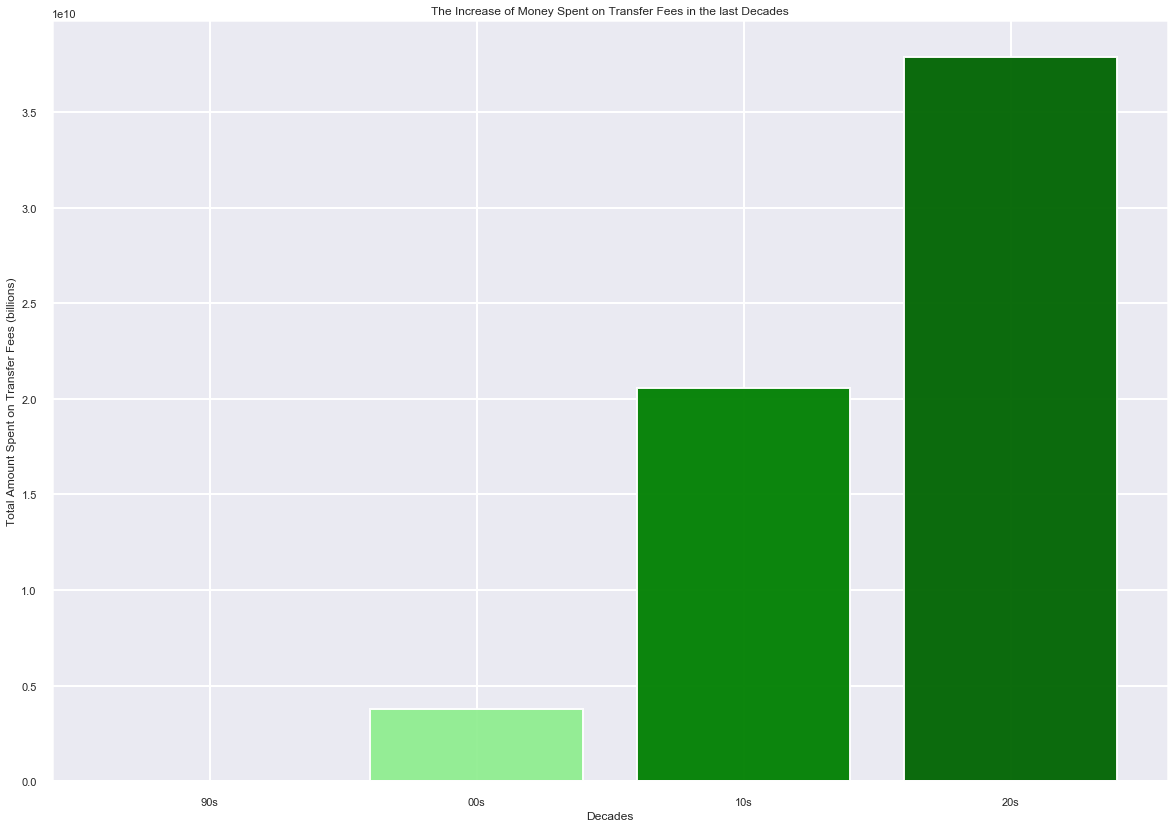

In [337]:
#MATPLOTLIB
plt.figure(figsize = (20,14))
plt.bar(range(len(my_list)), my_list, color=['darkgreen', 'lightgreen', 'green', 'darkgreen'],alpha = 0.95)
plt.xlabel('Decades')
plt.ylabel('Total Amount Spent on Transfer Fees (billions)')
plt.title('The Increase of Money Spent on Transfer Fees in the last Decades')
ax = plt.subplot()
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['90s', '00s','10s', '20s'])

plt.show()

In [323]:
#----------------------------------------------------------------------------------------------------------------

In [288]:
values['years'] = values['date'].str.split('-',expand=True)[0]
fees = values[['years','fee']].copy()
print(fees)

       years        fee
0       2017        0.0
1       2015        0.0
7       2011  3400000.0
8       2010        0.0
13      2006        0.0
...      ...        ...
111594  2001        0.0
111595  2000   800000.0
111596  1997  1100000.0
111597  1994   100000.0
111601  2016        0.0

[42764 rows x 2 columns]


In [312]:
each_year = fees.groupby([fees['years']]).sum().reset_index()

In [313]:
print(each_year["years"].head())

0    1984
1    1986
2    1987
3    1988
4    1989
Name: years, dtype: object


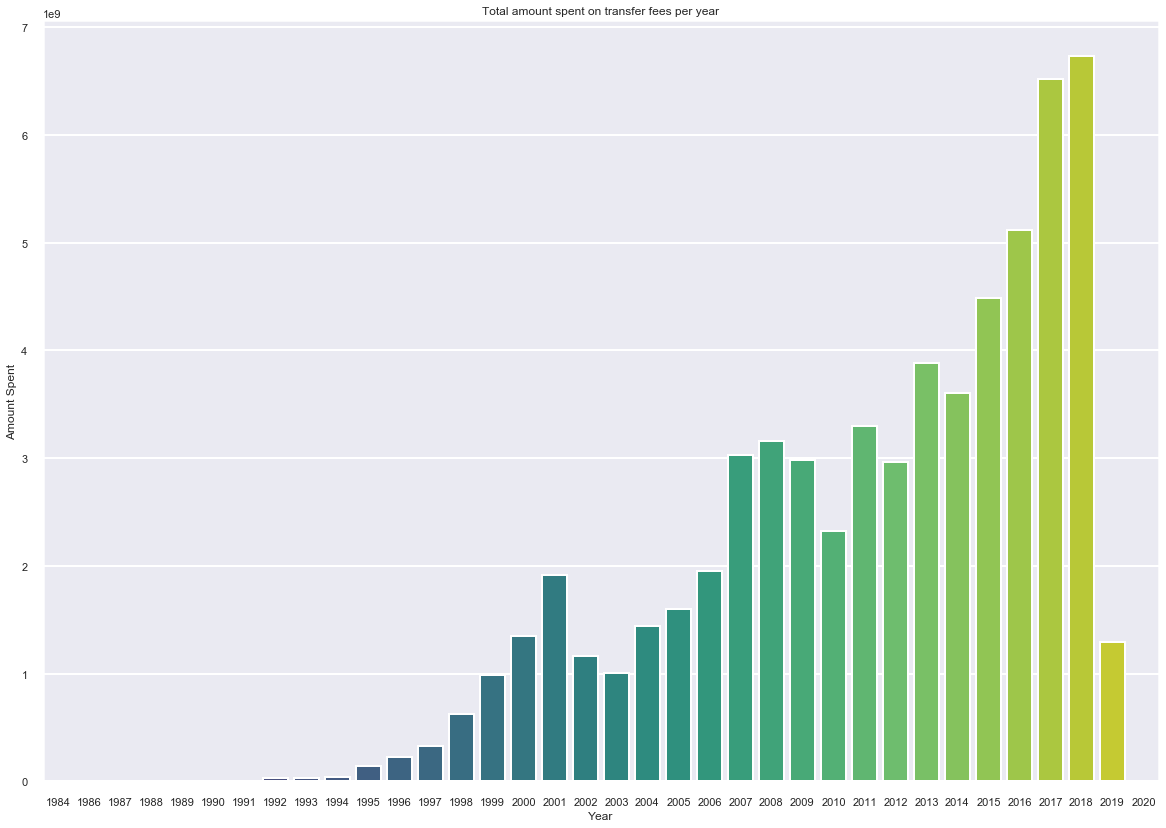

In [335]:
#SEABORN
sns.set_style('darkgrid')
sns.set_context("poster",font_scale=0.5)
f, ax = plt.subplots(figsize = (20,14))
x = each_year["years"]
y = each_year["fee"]
ax.set_title('Total amount spent on transfer fees per year')
ax = sns.barplot(x, y, palette="viridis")
ax.set(xlabel='Year', ylabel='Amount Spent')
plt.show()

In [324]:
#-----------------------------------------------------------------------------------------------------

In [325]:
each_year2 = fees.groupby([fees['years']]).count().reset_index()

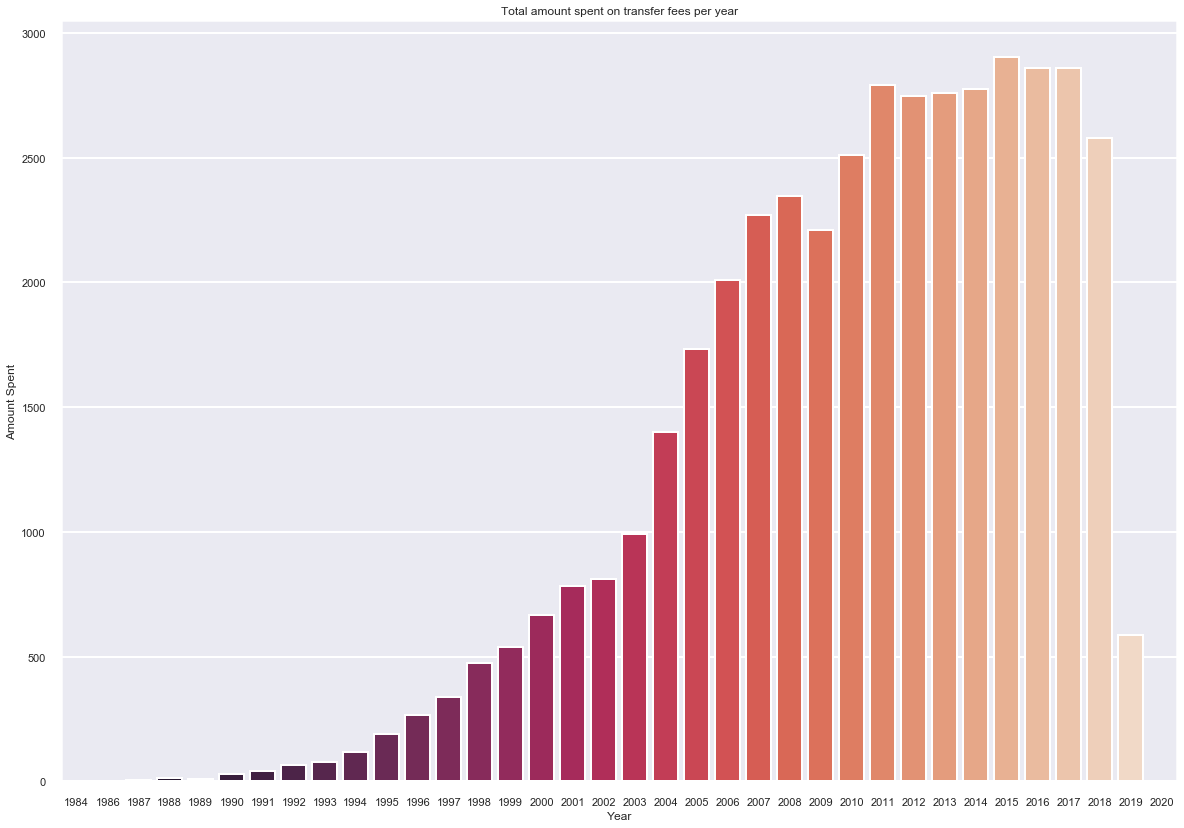

In [330]:
sns.set_style('darkgrid')
sns.set_context("poster",font_scale=0.5)
f, ax = plt.subplots(figsize = (20,14))
x = each_year2["years"]
y = each_year2["fee"]
ax.set_title('Total amount spent on transfer fees per year')
ax = sns.barplot(x, y,palette="rocket")
ax.set(xlabel='Year', ylabel='Amount Spent')
plt.show()